The Safest Neighborhood in Pittsburgh
We wanted to determine what the safest neighborhood in Pittsburgh is based on crimes, fires, and air quality.


Crimes

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

crime = pd.read_csv("arrestdata.csv")



Central Business District    4238
South Side Flats             3377
Carrick                      2297
East Allegheny               2153
Homewood South               2044
                             ... 
Regent Square                  36
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


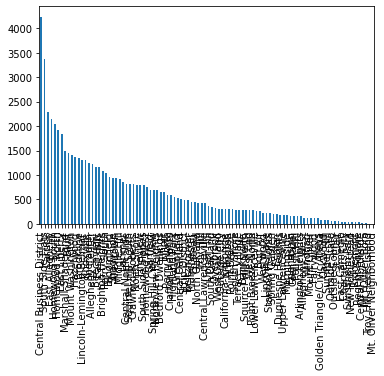

In [5]:
print(crime['INCIDENTNEIGHBORHOOD'].value_counts())
crime['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar()

Based on these initial findings, Mt. Oliver Neighborhood appears to be the safest, with the Central Business District being the most dangerous.  Unfortunately, the arrest dataset did not contain any population data for the neighborhoods, so this is only the amount of crimes in a neighborhood, not the amount of crimes per an amount of people.

I also wanted to find out how these neighborhoods were specifically with violent crime.

Central Business District    842
South Side Flats             813
Carrick                      763
Marshall-Shadeland           572
Homewood North               527
                            ... 
Outside State                  6
Mt. Oliver Boro                5
Mt. Oliver Neighborhood        1
Central Northside              1
Outside County                 1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64


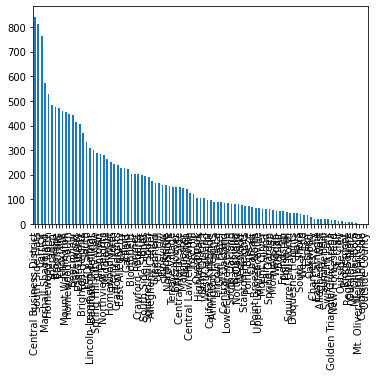

In [7]:
query_mask = crime['OFFENSES'].str.contains('Assault', na = False)
assault = crime[query_mask]
print(assault['INCIDENTNEIGHBORHOOD'].value_counts())
assault['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar()


Mt Oliver also has the lowest amount of assaults, and the Mt Oliver Borough has the second least.

Knoxville                      14
Carrick                        12
Sheraden                       12
Homewood South                 11
Homewood North                 11
                               ..
Upper Hill                      1
Terrace Village                 1
Troy Hill                       1
Golden Triangle/Civic Arena     1
Upper Lawrenceville             1
Name: INCIDENTNEIGHBORHOOD, Length: 61, dtype: int64


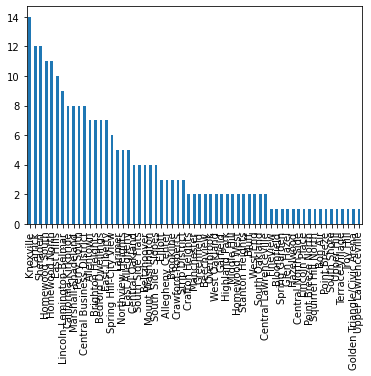

In [16]:
query_mask = crime['OFFENSES'].str.contains('Homicide', na = False)
homicide = crime[query_mask]
print(homicide['INCIDENTNEIGHBORHOOD'].value_counts())
homicide['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar()

This graph has less elements than the previous one because it does not show neighborhoods with 0 homicides.  Mt Oliver does not have any murders, and is still appearing to be the safest neighborhood in terms of crime.

Central Business District    850
South Side Flats             817
Carrick                      775
Marshall-Shadeland           580
Homewood North               538
                            ... 
Outside State                  6
Mt. Oliver Boro                5
Mt. Oliver Neighborhood        1
Central Northside              1
Outside County                 1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64


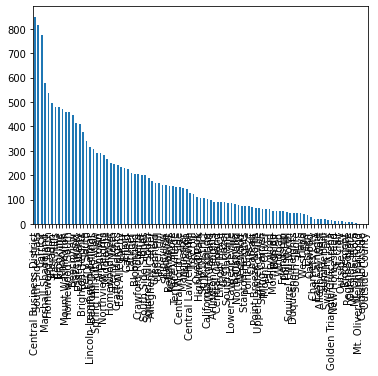

In [20]:
violentcrimes = pd.concat([assault, homicide])
print(violentcrimes['INCIDENTNEIGHBORHOOD'].value_counts())
violentcrimes['INCIDENTNEIGHBORHOOD'].value_counts().plot.bar()

If I assign normal crimes a value of 1 and violent crimes a value of 2, multiply the amount of those crimes and add them, I get my crime score.  Mt Oliver has the lowest with a score of 4, Troy Hill-Herrs Island is in second with a score of 6, Central Northside is third with a score of 25, and Mt Oliver Borough is fourth with a score of 28.